<a href="https://colab.research.google.com/github/kuffmode/Causal-influence-decomposition-of-an-ESN/blob/dev/Simulation_of_Bistable_Units.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx
from numba import njit, vectorize
import seaborn as sns


In [16]:
my_colors = ['#006685', '#3FA5C4', '#FFFFFF', '#E84653', '#BF003F']
colormap = sns.blend_palette(my_colors,as_cmap=True)

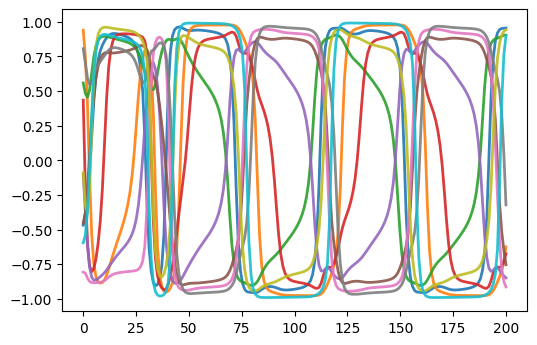

In [79]:
rng = np.random.default_rng(seed=42)

@vectorize
def phi(x):
    return np.tanh(x)

@njit
def flux(x,t):
    dxdt=phi(g*np.dot(W,x))-x
    return dxdt

T = 200
N=10
W=rng.standard_normal(size=(N,N))/N # maybe 1/sqrt(N)
g=2.6
s=0.5
W[np.diag_indices(N)]=s*np.ones(N)

t=np.linspace(0,T,T)
x0=rng.uniform(-1,1,N)
sol = odeint(flux, x0, t)

plt.figure(dpi=100)
for n in range(N):
    plt.plot(t,sol[:,n],alpha=0.9,lw=2)

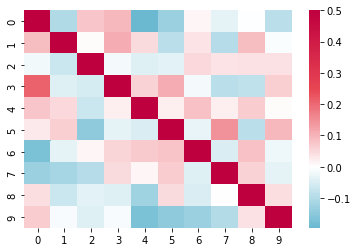

In [80]:
sns.heatmap(W,
            square=False,center=0,cmap=colormap)